<a href="https://colab.research.google.com/github/rohitr4307/PMI-Diabetic-Classifier/blob/master/pima-diabetic-prdiction-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark")
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from itertools import islice

import warnings
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/rohitr4307/PMI-Diabetic-Classifier.git

Cloning into 'PMI-Diabetic-Classifier'...
remote: Enumerating objects: 73344, done.
remote: Counting objects: 100% (23672/23672), done.
remote: Compressing objects: 100% (8589/8589), done.
remote: Total 73344 (delta 14901), reused 23655 (delta 14896), pack-reused 49672 (from 1)
Receiving objects: 100% (73344/73344), 128.08 MiB | 7.59 MiB/s, done.
Resolving deltas: 100% (50749/50749), done.
Updating files: 100% (87917/87917), done.


In [3]:
df = pd.read_csv("PMI-Diabetic-Classifier/data/diabetes.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.Outcome = df.Outcome.map({0: 'Non Diabetic', 1: 'Diabetic'})
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic


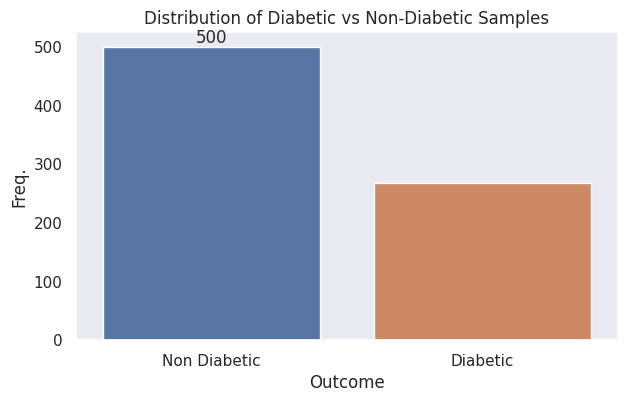

In [8]:
data = df.Outcome.value_counts().reset_index()

plt.figure(figsize=(7, 4))
fig = sns.barplot(data=data, x='Outcome', y='count', hue='Outcome')
fig.bar_label(fig.containers[0])
plt.title("Distribution of Diabetic vs Non-Diabetic Samples")
plt.ylabel('Freq.')
plt.show()

# fig = px.bar(data, x='Outcome', y='count', width=800, height=600, color='Outcome', title='Outcome Distribution')
# fig.show()

In [ ]:
# df = df.sort_values(['Pregnancies'])
# plt.figure(figsize=(14, 4))
# sns.histplot(data=df, x='Pregnancies', hue=df.Outcome, multiple='stack', discrete=True, bins=40, element='step')
# plt.title('#Pregnancies by Diabetic vs Non-Diabetic')
# plt.show()

fig = px.histogram(df, x='Pregnancies', color='Outcome', title='Pregnancies distribution by Outcome')
fig.show()

In [ ]:
# df = df.sort_values(['Glucose'])
# plt.figure(figsize=(14, 4))
# sns.histplot(data=df, x='Glucose', hue='Outcome', kde=False, element='step', multiple='stack')
# plt.title('Glucose Measure Distribution by Diabetic vs Non-Diabetic')
# plt.show()

fig = px.histogram(df, x='Glucose', color='Outcome', title='Glucose distribution by Outcome')
fig.show()

In [ ]:
# df = df.sort_values(['BloodPressure'])
# plt.figure(figsize=(14, 4))
# sns.histplot(data=df, x='BloodPressure', hue='Outcome', kde=False, element='step', multiple='stack')
# plt.title('Blood Pressure Measure Distribution by Diabetic vs Non-Diabetic')
# plt.show()

fig = px.histogram(df, x='BloodPressure', color='Outcome', title='BloodPressure distribution by Outcome')
fig.show()

In [ ]:
# df = df.sort_values(['SkinThickness'])
# plt.figure(figsize=(14, 4))
# sns.histplot(data=df, x='SkinThickness', hue='Outcome', kde=False, element='step', multiple='stack')
# plt.title('Skin Thickness Measure Distribution by Diabetic vs Non-Diabetic')
# plt.show()

fig = px.histogram(df, x='SkinThickness', color='Outcome', title='SkinThickness distribution by Outcome')
fig.show()

In [ ]:
# df = df.sort_values(['Insulin'])
# plt.figure(figsize=(14, 4))
# sns.histplot(data=df, x='Insulin', hue='Outcome', kde=False, element='step', multiple='stack')
# plt.title('Insulin Measure Distribution by Diabetic vs Non-Diabetic')
# plt.show()

fig = px.histogram(df, x='Insulin', color='Outcome', title='Insulin distribution by Outcome')
fig.show()

In [ ]:
# df = df.sort_values(['BMI'])
# plt.figure(figsize=(14, 4))
# sns.histplot(data=df, x='BMI', hue='Outcome', kde=False, element='step', multiple='stack')
# plt.title('BMI Measure Distribution by Diabetic vs Non-Diabetic')
# plt.show()

fig = px.histogram(df, x='BMI', color='Outcome', title='BMI distribution by Outcome')
fig.show()

In [ ]:
# df = df.sort_values(['DiabetesPedigreeFunction'])
# plt.figure(figsize=(14, 4))
# sns.histplot(data=df, x='DiabetesPedigreeFunction', hue='Outcome', kde=False, element='step', multiple='stack')
# plt.title('Diabetes Pedigree Function Measure Distribution by Diabetic vs Non-Diabetic')
# plt.show()

fig = px.histogram(df, x='DiabetesPedigreeFunction', color='Outcome', title='DiabetesPedigreeFunction distribution by Outcome')
fig.show()

In [ ]:
# df = df.sort_values(['Age'])
# plt.figure(figsize=(14, 4))
# sns.histplot(data=df, x='Age', hue='Outcome', kde=False, element='step', multiple='stack')
# plt.title('Age Measure Distribution by Diabetic vs Non-Diabetic')
# plt.show()

fig = px.histogram(df, x='Age', color='Outcome', title='Age distribution by Outcome')
fig.show()

In [ ]:
cols = df.drop('Outcome', axis=1).columns.tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))
# axes = ax.flatten()
# for i, col in zip(range(0, 8), cols):
#     sns.violinplot(data=df, x='Outcome', y=col, ax=axes[i])

# plt.tight_layout()
# plt.show()

# Create subplots layout with 2 rows and 4 columns (adjust based on your needs)
fig = make_subplots(rows=2, cols=4, subplot_titles=df.drop('Outcome', axis=1).columns)

# Iterate over each feature and add a violin plot to the subplot
for i, (col, subplot) in enumerate(zip(df.drop('Outcome', axis=1).columns, [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4)])):
    fig.add_trace(
        go.Violin(
            y=df[col],
            x=df['Outcome'].astype(str),  # Convert Outcome to string for grouping
            name=col,
            box_visible=True,
            meanline_visible=True,
            points='all',  # Show all points inside the violin plot
            line_color='blue',
            fillcolor='red'
        ),
        row=subplot[0],
        col=subplot[1]
    )

# Update layout for better visualization
fig.update_layout(
    height=800,  # Adjust height of the plot
    width=1400,  # Adjust width of the plot
    title_text="Violin Plots of Features by Outcome",
    showlegend=False
)

# Display the plot
fig.show()


In [ ]:
import plotly.express as px

# Assuming df is your DataFrame and 'Outcome' is the categorical feature for coloring
fig = px.scatter_matrix(
    df,  # Your DataFrame
    dimensions=df.drop('Outcome', axis=1).columns,  # Columns to include in the pairplot
    color='Outcome',  # Color by the categorical variable 'Outcome'
    height=1000,  # Adjust height
    width=1500,   # Adjust width
    symbol='Outcome',  # Different symbols for different categories
    opacity=0.9,  # Transparency of the points
)

# Update layout to improve readability
fig.update_layout(
    dragmode='select',  # Enable selection in the scatter matrix
    hovermode='closest',  # Show closest data point on hover
)

fig.show()

In [ ]:
# plt.figure(figsize=(8, 8))
# sns.pairplot(data=df, hue='Outcome')
# # plt.title('Age Measure Distribution by Diabetic vs Non-Diabetic')
# plt.legend(loc='lower center')
# plt.show()

In [ ]:
df.Outcome = df.Outcome.map({'Diabetic': 1.0, 'Non Diabetic': 0.0})

df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0


In [ ]:
corr_df = df.corr()

fig = px.imshow(
    corr_df,
    # labels=dict(x="Columns", y="Rows", color="Value"),  # Axis and color labels
    x=corr_df.columns,
    y=corr_df.index,
    color_continuous_scale='Plasma',  # Color scale (e.g., 'Viridis', 'Cividis', 'Plasma')
)

fig.show()

In [ ]:
# sns.heatmap(data=df.corr(), annot=True, annot_kws={"size": 8})
# # plt.xticks(rotation=45)
# plt.show()